In [ ]:
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, ReLU,LeakyReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense, Dropout,ZeroPadding2D,MaxPool2D,concatenate
#importing the required packages and libraries.
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D
from keras.datasets import cifar100
from keras.layers import LeakyReLU
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [ ]:
batch_size = 128 #batch size as 128
num_classes = 100 # we got 100 classes dataset
epochs = 50 # iterations over dataset

In [ ]:
img_rows, img_cols = 32, 32

In [ ]:
#Channels first means that in a specific tensor (consider a photo), you would have (Number_Of_Channels, Height , Width).
# we convert channel first to channel last.
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 #normalising the data.
x_test /= 255 #normalising the data.
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
#Model Creation
inputs = Input(shape=(32, 32, 3))
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(inputs)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)
X = BatchNormalization()(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)
X = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)
X = BatchNormalization()(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)
X = BatchNormalization()(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)

#Inception1
conv_1 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_1 = Conv2D(32, (3,3), padding='same', activation='relu')(conv_1)
conv_1 = BatchNormalization()(conv_1)
conv_1 = Conv2D(32, (3,3), padding='same', activation='relu')(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_2 = BatchNormalization()(conv_2)
conv_2 = Conv2D(32, (3,3), padding='same', activation='relu')(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Conv2D(32, (1,1), padding='same', activation='relu')(conv_3)
conv_3 = BatchNormalization()(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation='relu')(X)

X = concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

#Inception2
conv_1 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_1 = Conv2D(32, (1,7), padding='same', activation='relu')(conv_1)
conv_1 = BatchNormalization()(conv_1)
conv_1 = Conv2D(32, (7,1), padding='same', activation='relu')(conv_1)
conv_1 = Conv2D(32, (1,7), padding='same', activation='relu')(conv_1)
conv_1 = BatchNormalization()(conv_1)
conv_1 = Conv2D(32, (7,1), padding='same', activation='relu')(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_2 = Conv2D(32, (1,7), padding='same', activation='relu')(conv_2)
conv_2 = BatchNormalization()(conv_2)
conv_2 = Conv2D(32, (7,1), padding='same', activation='relu')(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Conv2D(32, (1,1), padding='same', activation='relu')(conv_3)
conv_3 = BatchNormalization()(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation='relu')(X)

X = concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)


#Inception3
conv_1 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_1 = Conv2D(32, (3,3), padding='same', activation='relu')(conv_1)
conv_11 = Conv2D(32, (1,3), padding='same', activation='relu')(conv_1)
conv_11 = BatchNormalization()(conv_11)
conv_12 = Conv2D(32, (3,1), padding='same', activation='relu')(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_21 = Conv2D(32, (1,3), padding='same', activation='relu')(conv_2)
conv_21 = BatchNormalization()(conv_21)
conv_22 = Conv2D(32, (3,1), padding='same', activation='relu')(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Conv2D(32, (1,1), padding='same', activation='relu')(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation='relu')(X)

X = concatenate([conv_11,conv_12,conv_21,conv_22,conv_3,conv_4], axis=3)


X = Conv2D(32, 3, activation='relu')(X)
X = Conv2D(64, 3, activation='relu')(X)
X = AveragePooling2D(4)(X)
X = Flatten()(X)
X = Dense(512, activation='relu')(X)
outputs = Dense(100, activation='softmax')(X)

model = Model(inputs, outputs)

In [ ]:

model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 32, 32, 32)   896         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 32, 32, 32)   9248        conv2d_40[0][0]                  
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 32, 32, 32)   128         conv2d_41[0][0]                  
_______________________________________________________________________________________

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.3
    )
datagen.fit(x_train)

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9),
              metrics=['accuracy'])

In [ ]:
# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test))
# save model after each epoch
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
checkpoint = ModelCheckpoint("inception_SGD_BN.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto',restore_best_weights=True)
#hist=model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(x_test, y_test),callbacks=[early, checkpoint])
hist=model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch = len(x_train) / 128, epochs=50, validation_data=(x_test, y_test),callbacks=[early,checkpoint])

Epoch 1/50
391/390 [==============================] - ETA: 0s - loss: 4.3625 - accuracy: 0.0439
Epoch 00001: val_accuracy improved from -inf to 0.02580, saving model to inception_SGD_BN.hdf5
391/390 [==============================] - 104s 266ms/step - loss: 4.3625 - accuracy: 0.0439 - val_loss: 4.5964 - val_accuracy: 0.0258
Epoch 2/50
391/390 [==============================] - ETA: 0s - loss: 3.7740 - accuracy: 0.1196
Epoch 00002: val_accuracy improved from 0.02580 to 0.14580, saving model to inception_SGD_BN.hdf5
391/390 [==============================] - 103s 263ms/step - loss: 3.7740 - accuracy: 0.1196 - val_loss: 3.6424 - val_accuracy: 0.1458
Epoch 3/50
391/390 [==============================] - ETA: 0s - loss: 3.5035 - accuracy: 0.1654
Epoch 00003: val_accuracy improved from 0.14580 to 0.15060, saving model to inception_SGD_BN.hdf5
391/390 [==============================] - 103s 263ms/step - loss: 3.5035 - accuracy: 0.1654 - val_loss: 3.6453 - val_accuracy: 0.1506
Epoch 4/50
391/3

In [ ]:
# Test the model
y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
#confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))

Prec: 0.5259592575257784
Recall: 0.4733
Accuracy: 0.4733


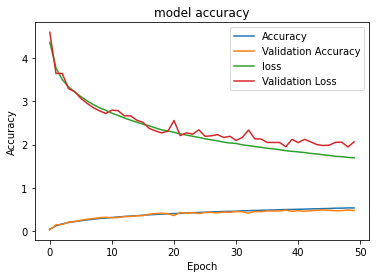

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

# cell to load best weights

In [ ]:
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, ReLU,LeakyReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense, Dropout,ZeroPadding2D,MaxPool2D,concatenate
#importing the required packages and libraries.
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D
from keras.datasets import cifar100
from keras.layers import LeakyReLU
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 #normalising the data.
x_test /= 255 #normalising the data.
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Model Creation
inputs = Input(shape=(32, 32, 3))
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(inputs)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)
X = BatchNormalization()(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)
X = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)
X = BatchNormalization()(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)
X = BatchNormalization()(X)
X = Conv2D(32, (3,3), strides = (1,1),padding='same',activation='relu')(X)

#Inception1
conv_1 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_1 = Conv2D(32, (3,3), padding='same', activation='relu')(conv_1)
conv_1 = BatchNormalization()(conv_1)
conv_1 = Conv2D(32, (3,3), padding='same', activation='relu')(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_2 = BatchNormalization()(conv_2)
conv_2 = Conv2D(32, (3,3), padding='same', activation='relu')(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Conv2D(32, (1,1), padding='same', activation='relu')(conv_3)
conv_3 = BatchNormalization()(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation='relu')(X)

X = concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

#Inception2
conv_1 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_1 = Conv2D(32, (1,7), padding='same', activation='relu')(conv_1)
conv_1 = BatchNormalization()(conv_1)
conv_1 = Conv2D(32, (7,1), padding='same', activation='relu')(conv_1)
conv_1 = Conv2D(32, (1,7), padding='same', activation='relu')(conv_1)
conv_1 = BatchNormalization()(conv_1)
conv_1 = Conv2D(32, (7,1), padding='same', activation='relu')(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_2 = Conv2D(32, (1,7), padding='same', activation='relu')(conv_2)
conv_2 = BatchNormalization()(conv_2)
conv_2 = Conv2D(32, (7,1), padding='same', activation='relu')(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Conv2D(32, (1,1), padding='same', activation='relu')(conv_3)
conv_3 = BatchNormalization()(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation='relu')(X)

X = concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)


#Inception3
conv_1 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_1 = Conv2D(32, (3,3), padding='same', activation='relu')(conv_1)
conv_11 = Conv2D(32, (1,3), padding='same', activation='relu')(conv_1)
conv_11 = BatchNormalization()(conv_11)
conv_12 = Conv2D(32, (3,1), padding='same', activation='relu')(conv_1)

conv_2 = Conv2D(32, (1,1), padding='same', activation='relu')(X)
conv_21 = Conv2D(32, (1,3), padding='same', activation='relu')(conv_2)
conv_21 = BatchNormalization()(conv_21)
conv_22 = Conv2D(32, (3,1), padding='same', activation='relu')(conv_2)

conv_3 = MaxPool2D((3,3), strides=(1,1), padding='same')(X)
conv_3 = Conv2D(32, (1,1), padding='same', activation='relu')(conv_3)

conv_4 = Conv2D(32, (1,1), padding='same', activation='relu')(X)

X = concatenate([conv_11,conv_12,conv_21,conv_22,conv_3,conv_4], axis=3)


X = Conv2D(32, 3, activation='relu')(X)
X = Conv2D(64, 3, activation='relu')(X)
X = AveragePooling2D(4)(X)
X = Flatten()(X)
X = Dense(512, activation='relu')(X)
outputs = Dense(100, activation='softmax')(X)

model = Model(inputs, outputs)

model.load_weights('../weights/InceptionV2_SGD_With_BatchNormalization.hdf5')

y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))